In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
y,x, sig= np.loadtxt('Calibration data.txt',usecols=(0,1,2),unpack=True)
print("x=",x)
print("y=",y)
print("sig=",sig)

x= [ 511.    1274.537 1173.228 1332.492  661.65 ]
y= [1511.94 3840.38 3531.34 4016.79 1972.03]
sig= [4.9    5.15   5.19   4.4    3.6914]


best slope a=  3.05 +/-  0.01
best intercept b= -45.51 +/-  6.10


Text(0.5, 0, 'measurement number')

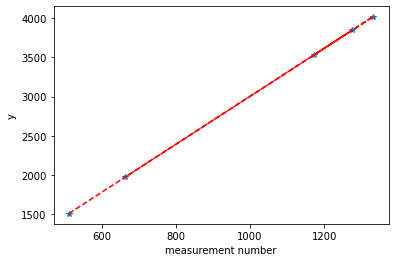

In [3]:
## this is the method to do the best fit we saw in class
A=np.sum(x/sig**2)
B=np.sum(1./sig**2)
C=np.sum(y/sig**2)
D=np.sum(x**2/sig**2)
E=np.sum(x*y/sig**2)

a=(E*B-C*A)/(D*B-A**2)
b=(D*C-E*A)/(D*B-A**2)
sig_a=np.sqrt((B/(D*B-A**2)))
sig_b=np.sqrt(D/(D*B-A**2))

print('best slope a= %5.2f' % a,'+/- %5.2f' % sig_a)
print('best intercept b= %5.2f' %b, '+/- %5.2f' %sig_b)
plt.figure(2)
plt.plot(x,y,ls='none',marker='*')
plt.errorbar(x,y,xerr=None, yerr=sig, fmt='none')
y_linear=a*x+b
plt.plot(x,y_linear,'r--')
plt.ylabel('y')
plt.xlabel('measurement number')

##################
## you could also use the method described in 
## https://faculty1.coloradocollege.edu/~sburns/LinearFitting/SimpleDataFittingWithError.html

In [4]:
# to see how good is the fit, one needs to compute the chi-squared
chi_individual=((y-(a*x+b))/sig)**2
print (chi_individual)
chi_squared=np.sum(chi_individual)
print('chi-quared= %5.2f ' % chi_squared)
print('reduced chi-squared=%5.2f' %(chi_squared/(len(x)-2)))
# you can go an compare this chi-squared to the table of chi-squared say in wikipedia. This value is very good 
# resulting in more 70% probability that these data are indeed linearly correlated

[9.17168927e-03 6.49984732e-04 6.57731635e-05 1.15389694e-03
 7.76865220e-03]
chi-quared=  0.02 
reduced chi-squared= 0.01


Text(0.5, 0, 'measurement number')

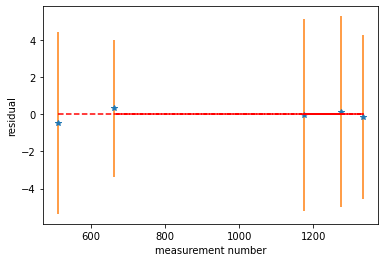

In [5]:
# now onto plotting the residuals
y_res=y-(a*x+b)
plt.figure(1)
plt.plot(x,y_res,ls='none',marker='*')
plt.errorbar(x,y_res,xerr=None, yerr=sig, fmt='none')
zero=np.array([0,0,0,0,0])
plt.plot(x,zero,'r--')
plt.ylabel('residual')
plt.xlabel('measurement number')

In [11]:
Eu, eu_sig=np.loadtxt('Europium peaks.txt',usecols=(0,1),unpack=True)
print(Eu)
print(eu_sig)
Energy=(Eu-b)/a
Error=eu_sig/a
print(Energy)
print(Error)

[ 324.078  699.34  1002.98  2333.32  2894.85 ]
[4.55 3.88 3.76 5.4  4.31]
[121.22445193 244.31130126 343.90596028 780.26071815 964.44392484]
[1.49241107 1.27264944 1.23328915 1.77121314 1.41369049]
